In [ ]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '3'

In [ ]:
config_path = "/userhome/jeon_mg/workspace/project/NF2/config/isee_noaa_12673_pf.json"

In [ ]:
import json

In [ ]:
with open(config_path) as config:
    info = json.load(config)

In [ ]:
info['data']

{'type': 'isee',
 'data_path': '/mnt/obsdata/isee_nlfff_v1.2/12673/12673_20170906_083600.nc',
 'slices': [0],
 'height_mapping': {'z': [0.0]},
 'Mm_per_pixel': 1,
 'boundary': {'type': 'potential', 'strides': 4},
 'height': 257,
 'b_norm': 2500,
 'spatial_norm': 320,
 'batch_size': {'boundary': 10000.0, 'random': 20000.0},
 'iterations': 100000.0,
 'work_directory': '/userhome/jeon_mg/workspace/_data/_tmp/isee/noaa_12673/20170906_083600_pf',
 'num_workers': 8}

In [ ]:
data_path = info['data']['data_path']

In [ ]:
from nf2.data.isee import load_nc

In [ ]:
b_slices = load_nc(data_path)

x (westward)  unit: Mm
y (northward)  unit: Mm
z (out ot photosphere)  unit: Mm
Bx (westward)  unit: G
By (northward)  unit: G
Bz (out of photosphere)  unit: G
Bx_pot (westward)  unit: G
By_pot (northward)  unit: G
Bz_pot (out of photosphere)  unit: G


In [ ]:
b_slices.shape

(513, 257, 257, 3)

In [ ]:
slices = info['data']['slices']

In [ ]:
b_slices = b_slices[:, :, slices]

In [ ]:
b_slices.shape

(513, 257, 1, 3)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
b_norm = info['data']['b_norm']

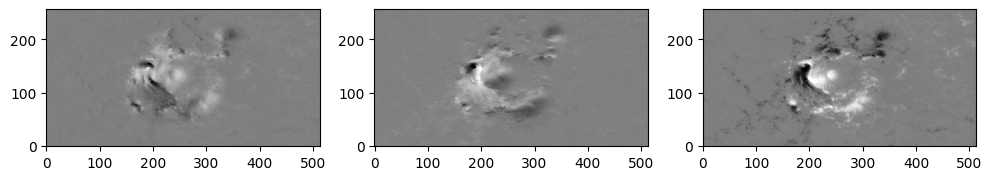

In [ ]:
for i in range(b_slices.shape[2]):
    fig, axs = plt.subplots(1, 3, figsize=(12, 4))
    axs[0].imshow(b_slices[..., i, 0].transpose(), vmin=-b_norm, vmax=b_norm, cmap='gray', origin='lower')
    axs[1].imshow(b_slices[..., i, 1].transpose(), vmin=-b_norm, vmax=b_norm, cmap='gray', origin='lower')
    axs[2].imshow(b_slices[..., i, 2].transpose(), vmin=-b_norm, vmax=b_norm, cmap='gray', origin='lower')
    plt.show()

In [ ]:
import numpy as np

In [ ]:
np.save('b_slices.npy', b_slices)

In [ ]:
coords = np.stack(np.mgrid[:b_slices.shape[0], :b_slices.shape[1], :b_slices.shape[2]], -1).astype(np.float32)

In [ ]:
coords.shape

(513, 257, 1, 3)

In [ ]:
coords = coords.reshape((-1, 3)).astype(np.float32)
values = b_slices.reshape((-1, 3)).astype(np.float32)

In [ ]:
np.save('coords.npy', coords)
np.save('values.npy', values)

In [ ]:
b_bottom = b_slices[:, :, 0]
b_bottom.shape

(513, 257, 3)

In [ ]:
height = info['data']['height']
height

257

In [ ]:
strides = info['data']['boundary']['strides']
strides

4

In [ ]:
from nf2.data.loader import load_potential_field_data

In [ ]:
pf_coords, pf_errors, pf_values = load_potential_field_data(b_bottom, height, strides, progress=True)

In [ ]:
pf_coords.shape, pf_values.shape

((32768, 3), (32768, 3))

In [ ]:
np.save('pf_coords.npy', pf_coords)
np.save('pf_values.npy', pf_values)